## KNN: Вино

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [4]:
X.shape

(178, 13)

In [5]:
X.isna().any().any()

False

In [6]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

В наборе данных нет пропущенных значений и нет категориальных переменных, поэтому нет необходимости перекодировать их.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.random.seed(2023)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Обучим на тренировочной выборке шесть классификаторов, отличающихся числом соседей. Воспользуемся для обучения признаками alcohol и magnesium - и Евклидово Расстояние.

In [9]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
X_train1 = X_train[['alcohol', 'magnesium']]
X_test1 = X_test[['alcohol', 'magnesium']]

In [12]:
normalizer1 = StandardScaler()
X_train_norm_np = normalizer1.fit_transform(X_train1)
X_train1 = pd.DataFrame(data=X_train_norm_np)
X_train1.head()

,0,1
0,0.391044,0.253795
1,-1.242181,-1.643928
2,0.094094,0.174723
3,-1.242181,-1.169497
4,0.180704,-0.062492


In [13]:
normalizer2 = StandardScaler()
X_test_norm_np = normalizer2.fit_transform(X_test1)
X_test1 = pd.DataFrame(data=X_test_norm_np)
X_test1.head()

,0,1
0,-0.768710,2.859564
1,-1.268989,-0.928010
2,1.604408,1.402805
3,-1.268989,-0.928010
4,1.809651,0.936642


Создадим шесть классификаторов с разным числом соседей, везде установим параметр p = 2 в качестве степени для расстояния Минковского, чтобы получить Евклидово расстояние. Далее обучим каждую из моделей на стандартизированных данных обучающей выборки (X_train1) и применим каждую из моделей сначала к тестовой, а затем к обучающей выборке.

In [14]:
clf1 = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10)
clf2 = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=10)
clf3 = KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=10)
clf4 = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=10)
clf5 = KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=10)
clf6 = KNeighborsClassifier(n_neighbors=25, p=2, n_jobs=10)

listofclf = [clf1, clf2, clf3, clf4, clf5, clf6]

clf1.fit(X_train1, y_train)
clf2.fit(X_train1, y_train)
clf3.fit(X_train1, y_train)
clf4.fit(X_train1, y_train)
clf5.fit(X_train1, y_train)
clf6.fit(X_train1, y_train)

y_predicted1 = clf1.predict(X_test1)
Test1 = np.mean(y_predicted1 == y_test)

y_predicted2 = clf1.predict(X_train1)
Train1 = np.mean(y_predicted2 == y_train)

y_predicted3 = clf2.predict(X_test1)
Test2 = np.mean(y_predicted3 == y_test)

y_predicted4 = clf2.predict(X_train1)
Train2 = np.mean(y_predicted4 == y_train)

y_predicted5 = clf3.predict(X_test1)
Test3 = np.mean(y_predicted5 == y_test)

y_predicted6 = clf3.predict(X_train1)
Train3 = np.mean(y_predicted6 == y_train)

y_predicted7 = clf4.predict(X_test1)
Test4 = np.mean(y_predicted7 == y_test)

y_predicted8 = clf4.predict(X_train1)
Train4 = np.mean(y_predicted8 == y_train)

y_predicted9 = clf5.predict(X_test1)
Test5 = np.mean(y_predicted9 == y_test)

y_predicted10 = clf5.predict(X_train1)
Train5 = np.mean(y_predicted10 == y_train)

y_predicted11 = clf6.predict(X_test1)
Test6 = np.mean(y_predicted11 == y_test)

y_predicted12 = clf6.predict(X_train1)
Train6 = np.mean(y_predicted12 == y_train)

Test = np.array([Test1, Test2, Test3, Test4, Test5, Test6])
Train = np.array([Train1, Train2, Train3, Train4, Train5, Train6])
n = np.array([1, 3, 5, 10, 15, 25])
data1 = {'NN': n, 'Train': Train, 'Test': Test}
df = pd.DataFrame(data=data1)
df

,NN,Train,Test
0,1,0.991935,0.648148
1,3,0.782258,0.648148
2,5,0.766129,0.703704
3,10,0.725806,0.537037
4,15,0.725806,0.574074
5,25,0.717742,0.611111


In [ ]:
!pip install mlxtend

In [15]:
import mlxtend

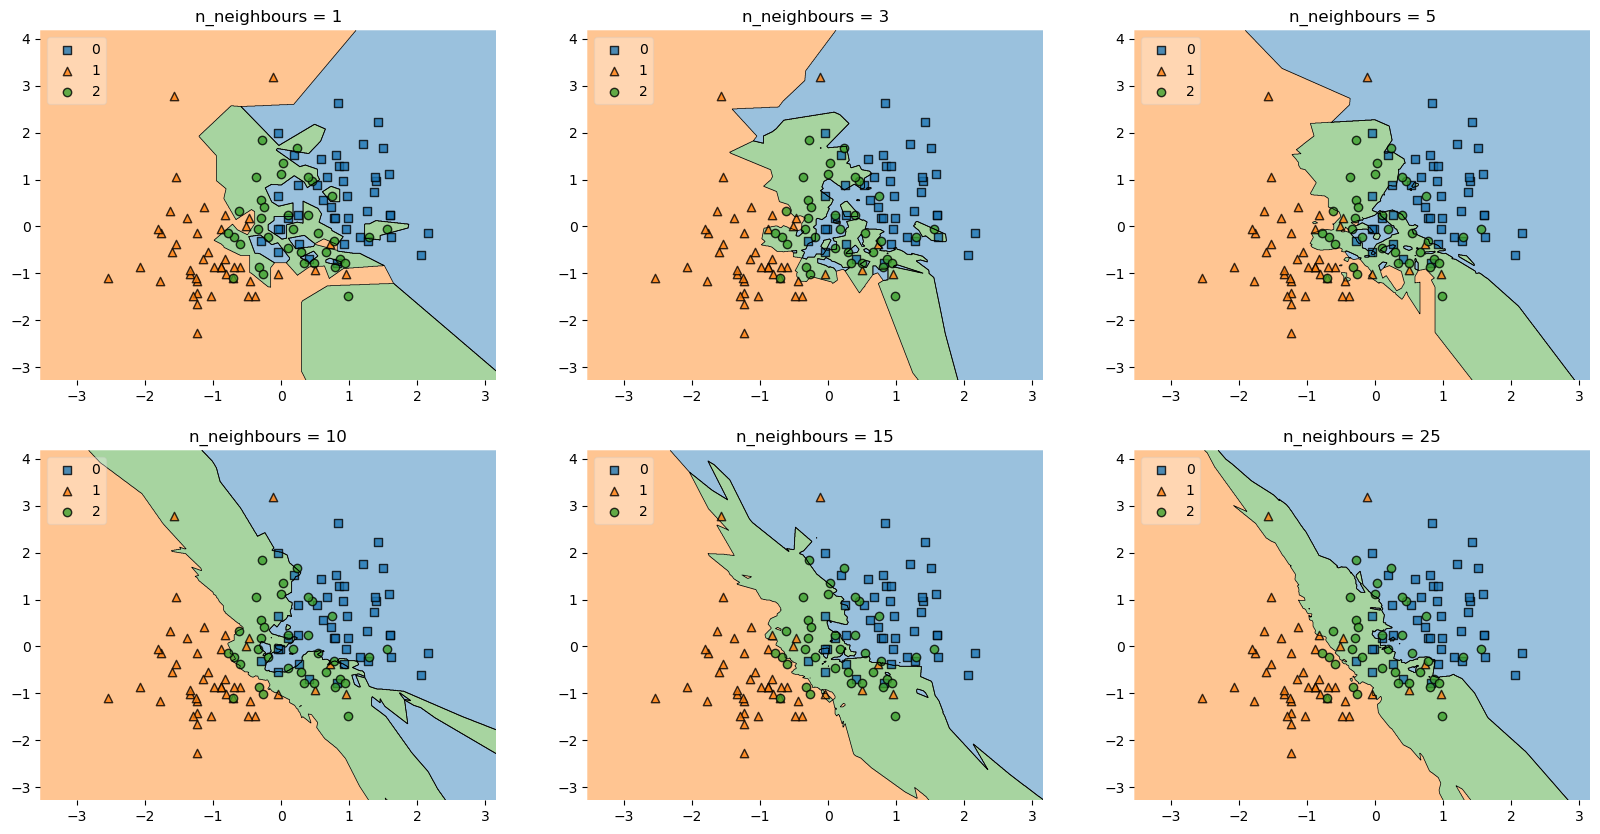

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20, 10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip(listofclf,
                         labels,
                         itertools.product(range(2), range(3))):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train1.to_numpy(), y = y_train, clf = clf, legend = 2)
    plt.title(lab)

plt.show()

С точки зрения полученной таблицы, нам стоит выбрать 3 ближайших соседа, потому что для 3 соседей мы получаем наиболее оптимальный результат на тестовой выборке - 70% accuracy, однако у этого выбора есть подводный камень. Когда мы делим данные всего на две части, обучающая выборка используется нами для поиска соседей, а тестовая - для поиска оптимального гиперпараметра и проверки точности одновременно. Выходит, что мы получили достаточно высокую accuracy 70% на тестовых данных, которые и использовали для подбора k. В этом случае я не могу утверждать, что модель покажет такую же высокую точность на совсем новых данных. Для решения этой проблемы стоит использовать кросс-валидацию. Однако в поставленных условиях попробуем довериться результатам на тестовой выборке и графикам решающих поверхностей.

Заметим, что графики в задании 1.5 иллюстрируют распределение данных из обучающей выборки, по ним мы можем увидеть, насколько сильно модель подстроилась под данные обучения. Например на графике для k = 1 видим, как решающая поверхность аккуратно захватывает точки данных, она явно переобучена. Чем более гладкими получаются границы классов, тем в меньшей степени модель подстраивается под данные. Это будет происходить с ростом числа соседей. Мы видим, что график для 25 соседей в меньшей степени переобучен, у него самые гладкие границы классов. Обратимся к графику k = 3, для которого мы получили самый высокий результат на тестовой выборке. Заметим неровные границы классов (например, синий класс появляется в центре графика, где на "территории кружочков 2 класса" расположены квадратики 0 класса из обучающей выборки - скорее всего это просто особенность данных обучающей выборки). Обратившись к таблице из задания 1.3 заметим, что классификатор для 25 соседей даёт самый низкий (но не критичный) результат 71% на данных обучения, но при этом неплохой результат 61% на данных теста. При этом большее число соседей даёт самую гладкую решающую поверхность и не переобученную модель. Ещё мы знаем, что по мере приближения числа соседей к числу наблюдений, снижается качество модели. Таким образом качество модели сначала растёт с ростом числа соседей, а после некоторой точки близкой к числу наблюдений начинает снижаться. 25 в нашем случае не близко к числу наблюдений. По этим соображениям стоит выбрать k = 25 в качестве числа соседей.

## Имплементация KNN руками

In [17]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
    
    def predict(self, X):
        num_obs = X.shape[0]
        y_pred = np.zeros(num_obs)

        for i in range(num_obs):
            distances = np.linalg.norm((self.X - X[i, :]), axis = 1)
            near_indx = np.argsort(distances)
            k_near_indx = near_indx[:self.k]
            near_class = self.y[k_near_indx]
            near_counts = Counter(near_class)
            y_pred[i] = near_counts.most_common(1)[0][0]

        return y_pred

# Пояснения к коду

При помощи функции init определим (инициализируем) гиперпараметр k, который будет отвечать за число ближайших соседей. Функция fit сохраняет массив X и массив y как атрибуты KNN. Predict принимает на вход массив данных X. Создадим переменную num_obs, отвечающую за число наблюдений в выборке, это соответствует числу строк в X. Также создадим вектор из нулей y размерности 1 на число наблюдений. Цикл for сначала вычисляет евклидовы расстояния между точкой тестовых данных и каждой точкой в обучающей выборке. Затем он находит k ближайших соседей на основе расстояний и определяет классы ближайших соседей. С помощью Counter считаем количество меток каждого класса среди k ближайших соседей. Присваиваем наиболее распространенный класс среди ближайших соседей в качестве прогнозируемого класса (.most_common вернет список из n наиболее распространенных элементов и их количество, поэтому установим 1 в качестве n и выберем самый первый элемент списка). Функция predict возвращает массив прогнозируемых ответов для каждого объекта тестовых данных.

Проверим работу кода при помощи assert.

In [18]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [19]:
test_knn(KNN)